In [1]:
import pandas as pd

df = pd.read_csv('cars-1.csv')
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
# 1. Building the K-Means clustering algorithm:
# a. Start off by extracting the ‘mpg’, ‘disp’ & ‘hp’ columns from the ‘mtcars’
# data.frame. Store the result in ‘car_features’

car_features = df[['mpg','disp','hp']]
car_features.head()

,mpg,disp,hp
0,21.0,160.0,110
1,21.0,160.0,110
2,22.8,108.0,93
3,21.4,258.0,110
4,18.7,360.0,175


In [7]:
# b. Build the K-Means algorithm on top of ‘car_features’. Here, the number
# of clusters should be 3
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(car_features)

c:\Users\arvin\miniconda3\envs\6.86x\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\arvin\miniconda3\envs\6.86x\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [8]:
# c. Bind the clustering vector to ‘car_features’

car_features['Cluster'] = clusters

# Display the first few rows of the resulting DataFrame
print(car_features.head())

    mpg   disp   hp  Cluster
0  21.0  160.0  110        1
1  21.0  160.0  110        1
2  22.8  108.0   93        1
3  21.4  258.0  110        0
4  18.7  360.0  175        2


C:\Users\arvin\AppData\Local\Temp\ipykernel_13876\3430193735.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_features['Cluster'] = clusters


In [10]:
# Iterate through each cluster
for cluster_id in range(k):
    cluster_data = car_features[car_features['Cluster'] == cluster_id]
    
    # Display cluster information
    print(f"Cluster {cluster_id} - Number of observations: {len(cluster_data)}")
    print(cluster_data)
    print("\n")

Cluster 0 - Number of observations: 7
     mpg   disp   hp  Cluster
3   21.4  258.0  110        0
5   18.1  225.0  105        0
11  16.4  275.8  180        0
12  17.3  275.8  180        0
13  15.2  275.8  180        0
21  15.5  318.0  150        0
22  15.2  304.0  150        0


Cluster 1 - Number of observations: 16
     mpg   disp   hp  Cluster
0   21.0  160.0  110        1
1   21.0  160.0  110        1
2   22.8  108.0   93        1
7   24.4  146.7   62        1
8   22.8  140.8   95        1
9   19.2  167.6  123        1
10  17.8  167.6  123        1
17  32.4   78.7   66        1
18  30.4   75.7   52        1
19  33.9   71.1   65        1
20  21.5  120.1   97        1
25  27.3   79.0   66        1
26  26.0  120.3   91        1
27  30.4   95.1  113        1
29  19.7  145.0  175        1
31  21.4  121.0  109        1


Cluster 2 - Number of observations: 9
     mpg   disp   hp  Cluster
4   18.7  360.0  175        2
6   14.3  360.0  245        2
14  10.4  472.0  205        2
15  10.4  4

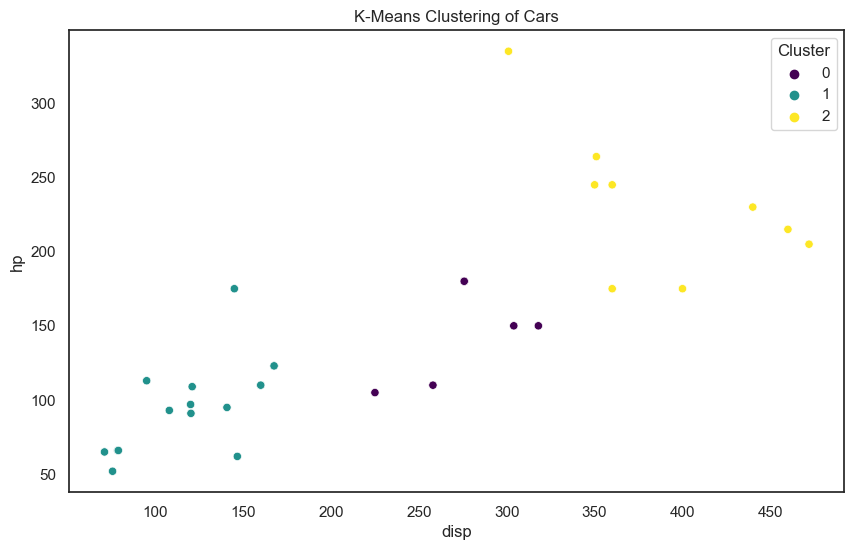

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'car_features' DataFrame with clustering information

# Set the style of seaborn
sns.set(style="white")

# Create a scatter plot of 'disp' vs 'hp' with different colors for each cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x='disp', y='hp', hue='Cluster', data=car_features, palette='viridis')
plt.title('K-Means Clustering of Cars')
plt.xlabel('disp')
plt.ylabel('hp')
plt.legend(title='Cluster')
plt.show()


In [20]:
# 2. On the same ‘car_features’dataset build a K-Means algorithm, where the
# number of clusters is 5
# a. Bind the clustering vector to ‘car_features’
# b. Extract observations belonging to individual clusters


# Build K-Means algorithm with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)
car_features['Cluster'] = kmeans.fit_predict(car_features.loc[:, ['mpg', 'disp', 'hp']])

# Extract observations belonging to individual clusters
cluster_0 = car_features[car_features.loc[:,'Cluster'] == 0]
cluster_1 = car_features[car_features.loc[:,'Cluster'] == 1]
cluster_2 = car_features[car_features.loc[:,'Cluster'] == 2]
cluster_3 = car_features[car_features.loc[:,'Cluster'] == 3]
cluster_4 = car_features[car_features.loc[:,'Cluster'] == 4]

# Print some information about the clusters
print(f"Number of observations in Cluster 0: {len(cluster_0)}")
print(f"Number of observations in Cluster 1: {len(cluster_1)}")
print(f"Number of observations in Cluster 2: {len(cluster_2)}")
print(f"Number of observations in Cluster 3: {len(cluster_3)}")
print(f"Number of observations in Cluster 4: {len(cluster_4)}")


Number of observations in Cluster 0: 11
Number of observations in Cluster 1: 4
Number of observations in Cluster 2: 7
Number of observations in Cluster 3: 4
Number of observations in Cluster 4: 6


c:\Users\arvin\miniconda3\envs\6.86x\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\arvin\miniconda3\envs\6.86x\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\arvin\AppData\Local\Temp\ipykernel_13876\957141334.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_features['Cluster'] = kmeans.fit_predict(car_features.loc[:, ['mpg', 'disp', 'hp']])


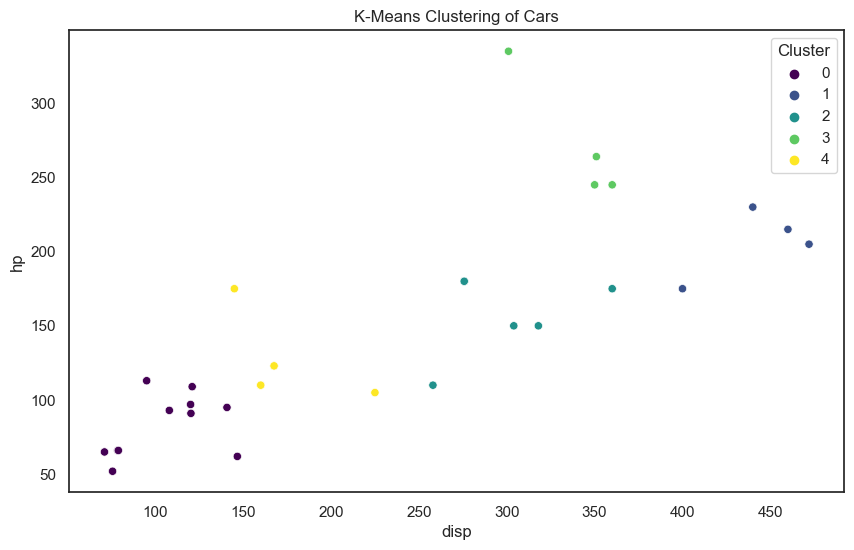

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'car_features' DataFrame with clustering information

# Set the style of seaborn
sns.set(style="white")

# Create a scatter plot of 'disp' vs 'hp' with different colors for each cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x='disp', y='hp', hue='Cluster', data=car_features, palette='viridis')
plt.title('K-Means Clustering of Cars')
plt.xlabel('disp')
plt.ylabel('hp')
plt.legend(title='Cluster')
plt.show()
